This file plots the histogram of the host galaxy mass in the IllustrisTNG simulations.

In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG100-1/output"


In [2]:
initial_snapshot = 69
end_snapshot = 99

halos_fields = ["GroupFirstSub", "GroupNsubs", "GroupMass", "GroupPos"]
subhalos_fields = ["SubhaloGrNr", "SubhaloMass", "SubhaloPos"]
tree_fields = ["SubfindID", "SnapNum"]

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [3]:
halos_data = il.groupcat.loadHalos(basePath, end_snapshot, fields=halos_fields)
subhalos_data = il.groupcat.loadSubhalos(basePath, end_snapshot, fields=subhalos_fields)
first_subhalo_indices = halos_data["GroupFirstSub"]
n_subhalos = halos_data["GroupNsubs"]
group_mass = halos_data["GroupMass"]
subhalos_grnr = subhalos_data["SubhaloGrNr"]
subhalos_mass = subhalos_data["SubhaloMass"]


In [4]:
def Detect_Mkdir(Path):
    if not (os.path.exists(Path)):
        os.makedirs(Path)
    return Path


In [5]:
FilePath = Detect_Mkdir(os.path.join('./TNG100_Final_File'))
Final_File_List = ['Halo_Array', 'Host_Array', 'MMS_Array', 'First_App_Snap_Array', 'First_App_Distance_Array',
                   'Snap99_Distance_Array', 'Snap99_Radial_Velocity_Array', 'Snap99_Virial_Radius_Array', 'Is_First_Approach']
for filename in Final_File_List:
    if os.path.exists(os.path.join(FilePath, filename)+'.npy'):
        globals()[filename] = np.load(
            (os.path.join(FilePath, filename)+'.npy'))


In [6]:
condition = (Is_First_Approach==1)

First_Approach_Sub_Index = np.where(condition)[0]


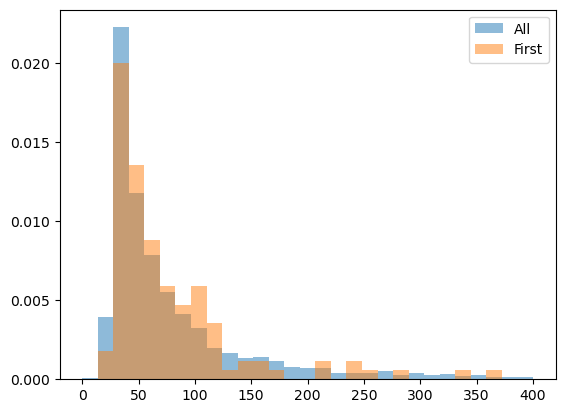

In [14]:
bins = np.linspace(0, 400, 30)
plt.hist(subhalos_mass[Host_Array],bins,density=1,alpha=0.5,label='All')
plt.hist(subhalos_mass[Host_Array[First_Approach_Sub_Index]],bins,density=1,alpha=0.5,label='First')

plt.legend(loc='upper right')


Text(0, 0.5, 'Density')

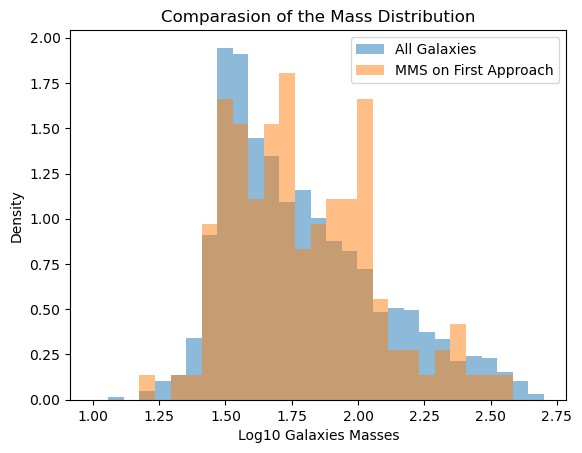

In [13]:
bins = np.linspace(1, 2.7, 30)
plt.hist(np.log10(subhalos_mass[Host_Array]),bins,density=1,alpha=0.5,label='All Galaxies')
plt.hist(np.log10(subhalos_mass[Host_Array[First_Approach_Sub_Index]]),bins,density=1,alpha=0.5,label='MMS on First Approach')

plt.legend(loc='upper right')
plt.title('Comparasion of the Mass Distribution')
plt.xlabel('Log10 Galaxies Masses')
plt.ylabel('Density')
